### Final Project

<h1><center> Artificial Intelligence & the press: <br>
    new(s) meanings with the emergence of generative AI systems</h1></center>
<h2><center>Part 2 | Text Analysis: WordCloud</center></h2>


<h3 align="right">by Silvia DalBen Furtado</h3> 

I decided to create a new jupyter notebook document just for the wordcloud.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Importing TopWords datasets per month

Here I will use another .csv file I downloaded from Mediacloud that is called "topwords". I will merge all the datasets and then generate the wordcloud.

In [2]:
#importing datasets
topwords_july_2022 = pd.read_csv('july_2022_topwords.csv')
topwords_aug_2022 = pd.read_csv('aug_2022_topwords.csv')
topwords_sept_2022 = pd.read_csv('sept_2022_topwords.csv')
topwords_oct_2022 = pd.read_csv('oct_2022_topwords.csv')
topwords_nov_2022 = pd.read_csv('nov_2022_topwords.csv')
topwords_dec_2022 = pd.read_csv('dec_2022_topwords.csv')
topwords_jan_2023 = pd.read_csv('jan_2023_topwords.csv')
topwords_feb_2023 = pd.read_csv('feb_2023_topwords.csv')
topwords_march_2023 = pd.read_csv('march_2023_topwords.csv')
topwords_april_2023 = pd.read_csv('april_2023_topwords.csv')
topwords_may_2023 = pd.read_csv('may_2023_topwords.csv')
topwords_june_2023 = pd.read_csv('june_2023_topwords.csv')

# taking a look at one of the datasets to see the variables
topwords_july_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   term    100 non-null    object 
 1   count   100 non-null    int64  
 2   ratio   100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


## TopWords before ChatGPT
I will (outer) merge all the datasets from July until November 2022.
ChatGPT was released on November 30, 2022.

In [3]:
df1 = topwords_july_2022.merge(topwords_aug_2022, how='outer', on='term')
df2 = df1.merge(topwords_sept_2022, how='outer', on='term')
df2.fillna(0, inplace=True)
df2

,term,count_x,ratio_x,count_y,ratio_y,count,ratio
0,intelligence,851.0,0.851,815.0,0.815,876.0,0.876
1,artificial,718.0,0.718,686.0,0.686,735.0,0.735
2,ai,163.0,0.163,163.0,0.163,173.0,0.173
3,technology,125.0,0.125,110.0,0.110,136.0,0.136
4,company,112.0,0.112,99.0,0.099,77.0,0.077
...,...,...,...,...,...,...,...
162,institute,0.0,0.000,0.0,0.000,17.0,0.017
163,challenge,0.0,0.000,0.0,0.000,17.0,0.017
164,applied,0.0,0.000,0.0,0.000,17.0,0.017
165,amazon,0.0,0.000,0.0,0.000,17.0,0.017


In [4]:
df3 = df2[['term', 'count_x', 'count_y', 'count']].copy()
df3['total_count'] = df3['count_x'] + df3['count_y'] + df3['count']
df3 = df3[['term', 'total_count']]
df3 # July, August and September 2022

,term,total_count
0,intelligence,2542.0
1,artificial,2139.0
2,ai,499.0
3,technology,371.0
4,company,288.0
...,...,...
162,institute,17.0
163,challenge,17.0
164,applied,17.0
165,amazon,17.0


In [5]:
df4 = df3.merge(topwords_oct_2022, how='outer', on='term')
df5 = df4.merge(topwords_nov_2022, how='outer', on='term')
df5.fillna(0, inplace=True)
df5

,term,total_count,count_x,ratio_x,count_y,ratio_y
0,intelligence,2542.0,877.0,0.877,836.0,0.836
1,artificial,2139.0,780.0,0.780,751.0,0.751
2,ai,499.0,180.0,0.180,200.0,0.200
3,technology,371.0,155.0,0.155,127.0,0.127
4,company,288.0,96.0,0.096,78.0,0.078
...,...,...,...,...,...,...
203,game,0.0,0.0,0.000,16.0,0.016
204,funds,0.0,0.0,0.000,16.0,0.016
205,effective,0.0,0.0,0.000,16.0,0.016
206,article,0.0,0.0,0.000,16.0,0.016


In [6]:
topwords_before_chatGPT = df5[['term', 'count_x', 'count_y', 'total_count']].copy()
topwords_before_chatGPT['count'] = topwords_before_chatGPT['count_x'] + topwords_before_chatGPT['count_y'] + topwords_before_chatGPT['total_count']
topwords_before_chatGPT = topwords_before_chatGPT[['term', 'count']]
topwords_before_chatGPT # From July until November 2022

,term,count
0,intelligence,4255.0
1,artificial,3670.0
2,ai,879.0
3,technology,653.0
4,company,462.0
...,...,...
203,game,16.0
204,funds,16.0
205,effective,16.0
206,article,16.0


In [7]:
# I need terms as string (not object) and count as int64 (not float)
topwords_before_chatGPT['term'] = topwords_before_chatGPT['term'].astype("string")
topwords_before_chatGPT['count'] = topwords_before_chatGPT['count'].astype(int)
topwords_before_chatGPT.info()
topwords_before_chatGPT

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   term    208 non-null    string
 1   count   208 non-null    int64 
dtypes: int64(1), string(1)
memory usage: 3.4 KB


,term,count
0,intelligence,4255
1,artificial,3670
2,ai,879
3,technology,653
4,company,462
...,...,...
203,game,16
204,funds,16
205,effective,16
206,article,16


In [8]:
# Exporting .csv
topwords_before_chatGPT.to_csv(r'topwords_before_chatgpt.csv', index=False)

## WordCloud before ChatGPT

#### For this analysis I am using these links as a resources:
https://stackoverflow.com/questions/43606339/generate-word-cloud-from-single-column-pandas-dataframe

https://medium.com/mlearning-ai/wordclouds-with-python-c287887acc8b

https://github.com/m3redithw/data-science-visualizations/blob/main/WordClouds/prepare.py

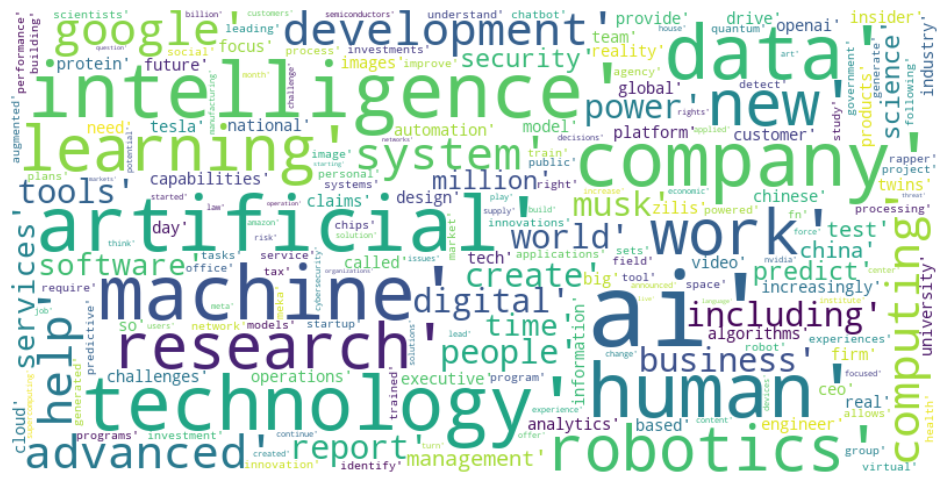

In [9]:
#WordCloud Before ChatGPT

topwords_before_chatGPT_csv = pd.read_csv(r"topwords_before_chatgpt.csv", encoding ="latin-1")

text = topwords_before_chatGPT_csv['term'].values 

wordcloud = WordCloud(width=800, height=400, collocations = False, background_color = 'white').generate(str(text))
plt.figure(figsize = (12, 8), facecolor = None)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

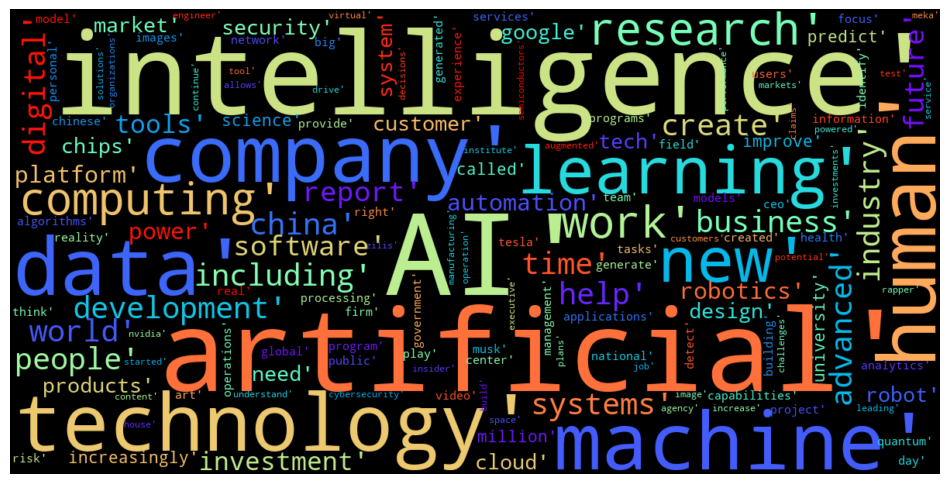

In [10]:
#WordCloud Before ChatGPT

# I manually edited the .csv file exported to capitalize the word AI and took out three words (so, q.ai, fn)
topwords_before_chatGPT_csv = pd.read_csv(r"topwords_before_chatgpt_cleaned.csv", encoding ="latin-1")

text = topwords_before_chatGPT_csv['term'].values 

wordcloud = WordCloud(scale = 3,
                       max_words = 150,
                       colormap='rainbow_r',
                       collocations = True,
                       background_color = 'black',
                       contour_color='black',
                       contour_width=1).generate(str(text))

plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Here I will create a second version of the wordcloud using the titles column of the main dataset (content) that was cleaned in the notebook part 3 (Topic Modelling Before ChatGPT).

In [36]:
titles_before_chatGPT_cleaned = pd.read_csv(r"titles_before_chatgpt_cleaned.csv", encoding ="latin-1")
titles_before_chatGPT_cleaned

,titles_without_stopwords
0,three company place high priority people
1,africa america forgotten need access capital
2,semi automated offside technology change qatar...
3,semi automatic offside place qatar world cup
4,fifa use new high tech offside call world cup
...,...
5543,elon musk say month first human implant brain ...
5544,elon musk neuralink show brain implant prototy...
5545,elon musk expects neuralink begin human trial ...
5546,florida child getting hit tsunami virus bad get


In [42]:
data2 = titles_before_chatGPT_cleaned["titles_without_stopwords"].astype(str).str.cat(sep=' ')

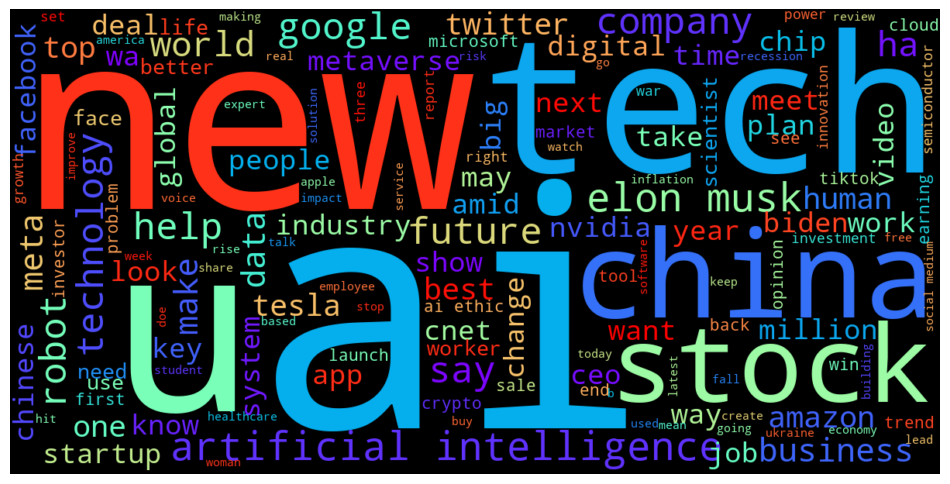

In [38]:
# This second wordcloud is based in the titles of each article before ChatGPT (July 2022 - November 2022)

wc2 = WordCloud(scale = 3,
               max_words = 150,
               colormap='rainbow_r',
               collocations = True,
               background_color = 'black',
               contour_color='black',
               contour_width=1).generate(data2)

plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Comparing both wordclouds, I prefer to use this second option, as I created the text data, and not used some text data generated by the Mediacloud app. I believe it is more reliable and is more connected with the topic modelling analysis too. I also prefered the black background, that has more contrast and make the words more readable.

## TopWords after ChatGPT

I will (outer) merge all the datasets from December 2022 until June 2023. ChatGPT was released on November 30, 2022.

In [11]:
df6 = topwords_dec_2022.merge(topwords_jan_2023, how='outer', on='term')
df7 = df6.merge(topwords_feb_2023, how='outer', on='term')
df7.fillna(0, inplace=True)
df7

,term,count_x,ratio_x,count_y,ratio_y,count,ratio
0,intelligence,925.0,0.925,896.0,0.896,914.0,0.914
1,artificial,833.0,0.833,823.0,0.823,857.0,0.857
2,ai,264.0,0.264,196.0,0.196,237.0,0.237
3,technology,149.0,0.149,118.0,0.118,133.0,0.133
4,new,107.0,0.107,102.0,0.102,134.0,0.134
...,...,...,...,...,...,...,...
164,bard,0.0,0.000,0.0,0.000,20.0,0.020
165,algorithms,0.0,0.000,0.0,0.000,20.0,0.020
166,processes,0.0,0.000,0.0,0.000,19.0,0.019
167,ability,0.0,0.000,0.0,0.000,19.0,0.019


In [12]:
df8 = df7[['term', 'count_x', 'count_y', 'count']].copy()
df8['total_count'] = df8['count_x'] + df8['count_y'] + df8['count']
df8 = df8[['term', 'total_count']]
df8 # December 2022, January and February 2023

,term,total_count
0,intelligence,2735.0
1,artificial,2513.0
2,ai,697.0
3,technology,400.0
4,new,343.0
...,...,...
164,bard,20.0
165,algorithms,20.0
166,processes,19.0
167,ability,19.0


In [13]:
df9 = df8.merge(topwords_march_2023, how='outer', on='term')
df10 = df9.merge(topwords_april_2023, how='outer', on='term')
df10.fillna(0, inplace=True)
df10

,term,total_count,count_x,ratio_x,count_y,ratio_y
0,intelligence,2735.0,937.0,0.937,962.0,0.962
1,artificial,2513.0,834.0,0.834,878.0,0.878
2,ai,697.0,280.0,0.280,299.0,0.299
3,technology,400.0,152.0,0.152,124.0,0.124
4,new,343.0,85.0,0.085,92.0,0.092
...,...,...,...,...,...,...
207,planning,0.0,0.0,0.000,18.0,0.018
208,interview,0.0,0.0,0.000,18.0,0.018
209,form,0.0,0.0,0.000,18.0,0.018
210,designed,0.0,0.0,0.000,18.0,0.018


In [14]:
df11 = df10[['term', 'count_x', 'count_y', 'total_count']].copy()
df11['t_count'] = df11['count_x'] + df11['count_y'] + df11['total_count']
df11 = df11[['term', 't_count']]
df11 # From December 2022 until April 2023

,term,t_count
0,intelligence,4634.0
1,artificial,4225.0
2,ai,1276.0
3,technology,676.0
4,new,520.0
...,...,...
207,planning,18.0
208,interview,18.0
209,form,18.0
210,designed,18.0


In [15]:
df12 = df11.merge(topwords_may_2023, how='outer', on='term')
df13 = df12.merge(topwords_june_2023, how='outer', on='term')
df13.fillna(0, inplace=True)
df13

,term,t_count,count_x,ratio_x,count_y,ratio_y
0,intelligence,4634.0,944.0,0.944,926.0,0.926
1,artificial,4225.0,891.0,0.891,853.0,0.853
2,ai,1276.0,277.0,0.277,281.0,0.281
3,technology,676.0,139.0,0.139,122.0,0.122
4,new,520.0,89.0,0.089,97.0,0.097
...,...,...,...,...,...,...
244,response,0.0,0.0,0.000,19.0,0.019
245,meta,0.0,0.0,0.000,19.0,0.019
246,down,0.0,0.0,0.000,19.0,0.019
247,consumers,0.0,0.0,0.000,19.0,0.019


In [16]:
topwords_after_chatGPT = df13[['term', 'count_x', 'count_y', 't_count']].copy()
topwords_after_chatGPT['count'] = topwords_after_chatGPT['count_x'] + topwords_after_chatGPT['count_y'] + topwords_after_chatGPT['t_count']
topwords_after_chatGPT = topwords_after_chatGPT[['term', 'count']]
topwords_after_chatGPT # From December 2022 until June 2023

,term,count
0,intelligence,6504.0
1,artificial,5969.0
2,ai,1834.0
3,technology,937.0
4,new,706.0
...,...,...
244,response,19.0
245,meta,19.0
246,down,19.0
247,consumers,19.0


In [17]:
# I need terms as string (not object) and count as int64 (not float)
topwords_after_chatGPT['term'] = topwords_after_chatGPT['term'].astype("string")
topwords_after_chatGPT['count'] = topwords_after_chatGPT['count'].astype(int)
topwords_after_chatGPT.info()
topwords_after_chatGPT

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   term    249 non-null    string
 1   count   249 non-null    int64 
dtypes: int64(1), string(1)
memory usage: 4.0 KB


,term,count
0,intelligence,6504
1,artificial,5969
2,ai,1834
3,technology,937
4,new,706
...,...,...
244,response,19
245,meta,19
246,down,19
247,consumers,19


In [18]:
# Exporting .csv
topwords_after_chatGPT.to_csv(r'topwords_after_chatgpt.csv', index=False)

## WordCloud after ChatGPT

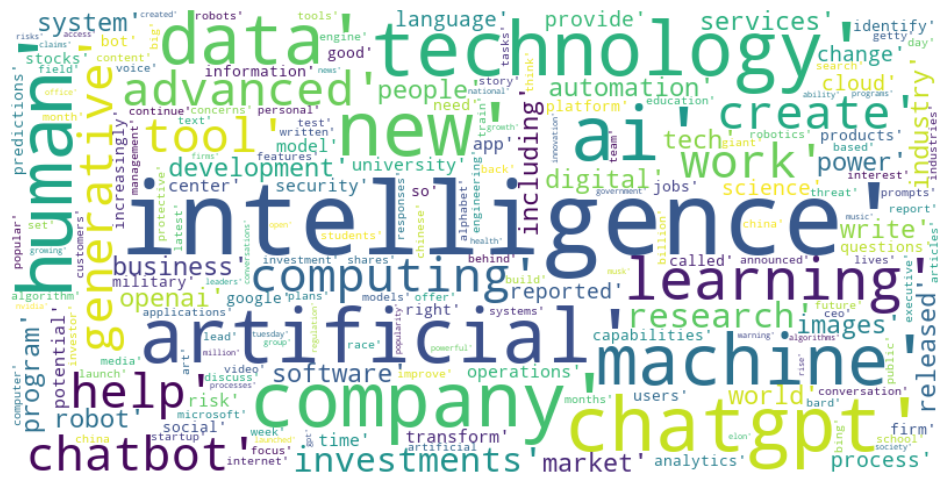

In [19]:
#WordCloud After ChatGPT

topwords_after_chatGPT_csv = pd.read_csv(r"topwords_after_chatgpt.csv", encoding ="latin-1")

text2 = topwords_after_chatGPT_csv['term'].values 

wordcloud2 = WordCloud(width=800, height=400, collocations = False, background_color = 'white').generate(str(text2))
plt.figure(figsize = (12, 8), facecolor = None)

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

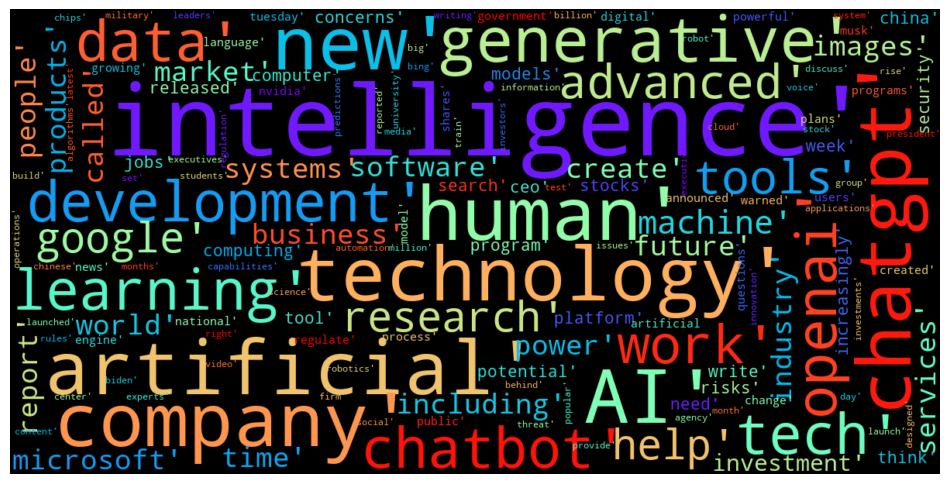

In [20]:
#WordCloud After ChatGPT

# I manually edited the .csv file exported to capitalize the word AI, combine the word china that was duplicated and took out the word so.
topwords_after_chatGPT_csv = pd.read_csv(r"topwords_after_chatgpt_cleaned.csv", encoding ="latin-1")

text2 = topwords_after_chatGPT_csv['term'].values 

wordcloud2 = WordCloud(scale = 3,
                       max_words = 150,
                       colormap='rainbow_r',
                       collocations = True,
                       background_color = 'black',
                       contour_color='black',
                       contour_width=1).generate(str(text2))

plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

## Here I will create a second version of the wordcloud using the titles column of the main dataset (content) that was cleaned in the notebook part 4 (Topic Modelling After ChatGPT).

In [26]:
titles_after_chatGPT_cleaned = pd.read_csv(r"titles_after_chatgpt_cleaned.csv", encoding ="latin-1")
titles_after_chatGPT_cleaned

,titles_without_stopwords
0,effective altruism fact ftx founder sam bankma...
1,elon musk neuralink show brain implant prototy...
2,effective altruism fact ftx founder sam bankma...
3,incoherent creepy deceptively gorgeous six lea...
4,incoherent creepy deceptively gorgeous six lea...
...,...
26954,stock market rebound toward high carnival delt...
26955,ai stock rival software maker battle blackrock...
26956,scary quickly ruin life south paris woman scam...
26957,ai may someday work medical miracle help paper...


In [41]:
data = titles_after_chatGPT_cleaned["titles_without_stopwords"].astype(str).str.cat(sep=' ')

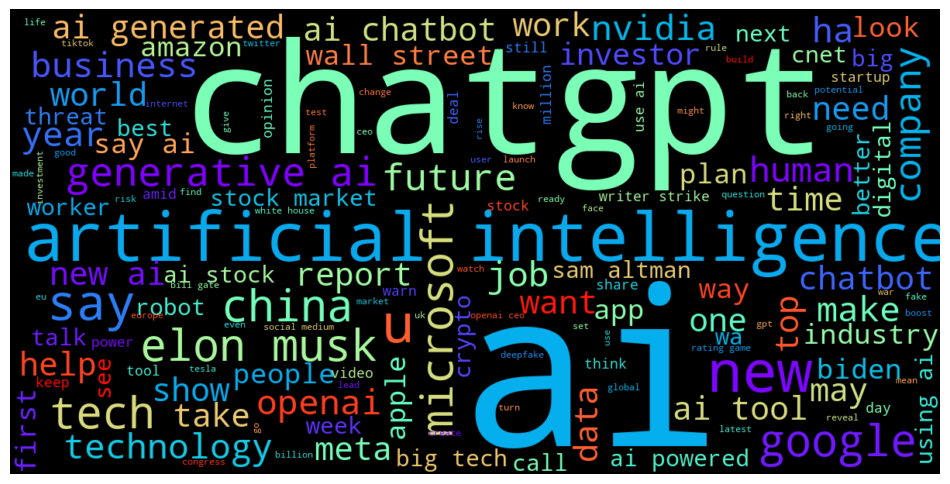

In [35]:
# This second wordcloud is based in the titles of each article

wc = WordCloud(scale = 3,
               max_words = 150,
               colormap='rainbow_r',
               collocations = True,
               background_color = 'black',
               contour_color='black',
               contour_width=1).generate(data)

plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Comparing both wordclouds, I prefer to use this second option, as I created the text data, and not used some text data generated by the Mediacloud app. I believe it is more reliable and is more connected with the topic modelling analysis too. I also prefered the black background, that has more contrast and make the words more readable.

#### Something that really influenced me in this decision was the comment on Mediacloud app related to the top words dataset that stated: "This is an experimental sample-based list of the top words in content matching your query. We have not strongly validated the results as representative. Use at your own risk. These results are from a random sample of news stories." So I do believe that the dataset I created and the second Word Cloud analysis is more reliable.